In [1]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time
import importlib

In [37]:
# Import PySSC module
import PySSC
importlib.reload(PySSC)

<module 'PySSC' from '/Users/adeliegorce/OneDrive - Imperial College London/PhD/EDE2019/PySSC/PySSC.py'>

In [3]:
# Redshift bins
zstakes = np.linspace(0.2,1.5,num=14)
zmin = np.min(zstakes) ; zmax = np.max(zstakes)
# Window function
nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz

## Comparison of Sij matrix for full sky and partial sky Sij for full-sky mask

In [4]:
# full sky Sij
t0 = time.clock()
print('Full sky Sij')
Sijw_full = PySSC.Sij(z_arr,windows_T)
# partial sky Sij with full-sky mask
t1 = time.clock()
print('Partial sky Sij')
Sijw_part = PySSC.Sij_psky(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits') #long computation
t2 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs' %(t1-t0,t2-t1))

Full sky Sij
Partial sky Sij
Sij full sky took: 3.6 secs, part sky 26.8 secs


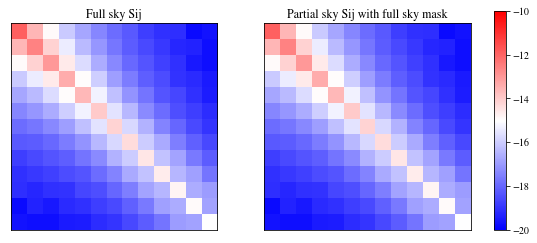

In [5]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_full)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_part)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sij')
axes[1].set_title('Partial sky Sij with full sky mask')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

100.0% of the part sky Sij bins are within 1% of the Sij full sky value


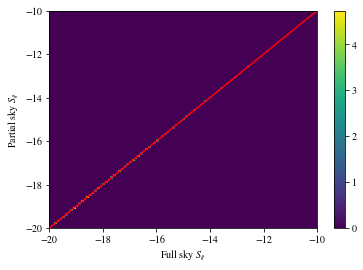

In [9]:
plt.figure()
plt.hist2d(np.log(abs(Sijw_full)).flatten(),np.log(abs(Sijw_part)).flatten(),bins=100,density=True,range=[[-20,-10],[-20,-10]])
plt.plot(np.linspace(-20,-10,100),np.linspace(-20,-10,100),color='r')
plt.xlabel(r'Full sky $S_{ij}$')
plt.ylabel(r'Partial sky $S_{ij}$')
plt.colorbar()

diff = (np.log(abs(Sijw_full)) - np.log(abs(Sijw_part)))/np.log(abs(Sijw_full)) *100
print('%.1f%% of the part sky Sij bins are within 1%% of the Sij full sky value' %(np.sum(diff<=1.)/nbins_T**2 *100))

<h3>More tests</h3>

In [10]:
# full sky Sij
t0 = time.clock()
Sijw_full_test = PySSC.Sij(z_arr,windows_T)
t1 = time.clock()
print('Sij full sky took: %.1f secs' %(t1-t0))

Sij full sky took: 4.3 secs


In [14]:
# partial sky Sij with full-sky mask
t0 = time.clock()
Sijw_part_test = PySSC.Sij_psky(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits') #long computation
t1 = time.clock()
print('Sij part sky took: %.1f secs' %((t1-t0)))

Sij part sky took: 22.5 secs


## Partial sky Sij for DES mask

In [16]:
t0 = time.clock()
Sijw_part_DES = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.1207
lmax = 143
Computed in 7.7 minutes


Text(0.5, 1.0, 'Sij for DES mask')

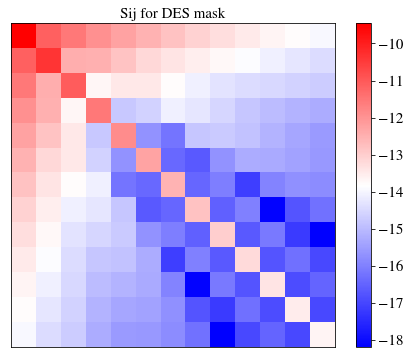

In [33]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.05,0.75,0.9]) 
P = ax.imshow(np.log(abs(Sijw_part_DES)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin]) 
plt.xticks([]) ; plt.yticks([]) 
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sij for DES mask',fontsize=15)

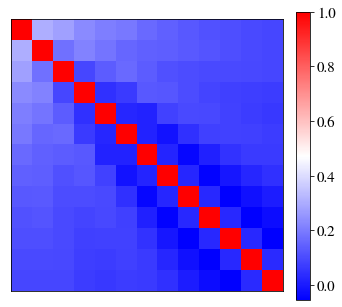

In [47]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
correlw_part_DES = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_DES[i,j] = Sijw_part_DES[i,j] / np.sqrt(Sijw_part_DES[i,i]*Sijw_part_DES[j,j])
#Plot it
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correlw_part_DES,interpolation='none',cmap='bwr')
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()

## Partial sky Sij for Euclid mask

In [34]:
t0 = time.clock()
Sijw_part_Euclid = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 101
Computed in 5.5 minutes


Text(0.5, 1.0, 'Sij for Euclid mask')

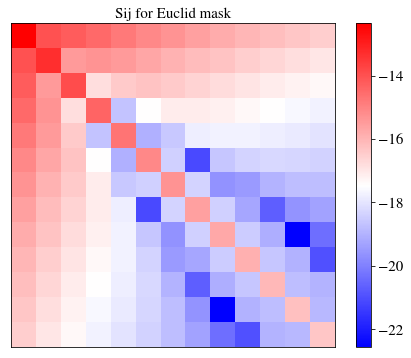

In [35]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.05,0.75,0.9]) 
P = ax.imshow(np.log(abs(Sijw_part_Euclid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin]) 
plt.xticks([]) ; plt.yticks([]) 
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sij for Euclid mask',fontsize=15)

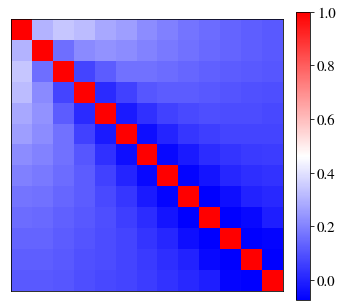

In [46]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
correlw_part_Euclid = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_Euclid[i,j] = Sijw_part_Euclid[i,j] / np.sqrt(Sijw_part_Euclid[i,i]*Sijw_part_Euclid[j,j])
#Plot it
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correlw_part_Euclid,interpolation='none',cmap='bwr')
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()

## Partial sky Sij for 5 degrees patch

In [37]:
t0 = time.clock()
Sijw_part_5d = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/circular-mask_5deg.fits',var_precision=0.05,verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.0019
lmax = 137
Computed in 9.1 minutes


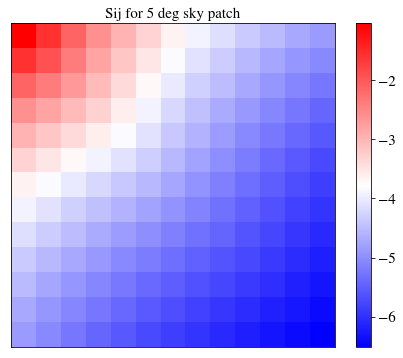

In [42]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.05,0.75,0.9]) 
P = ax.imshow(np.log(abs(Sijw_part_5d)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin]) 
plt.xticks([]) ; plt.yticks([]) 
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sij for 5 deg sky patch',fontsize=15)
plt.show()

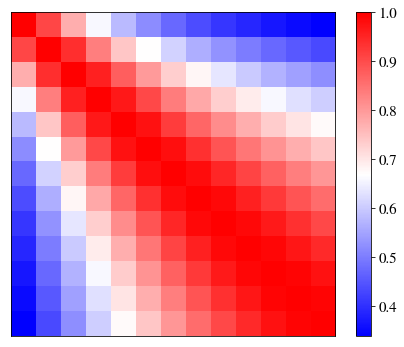

In [44]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
nzbins          = len(zstakes) - 1
correlw_part_5d = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_5d[i,j] = Sijw_part_5d[i,j] / np.sqrt(Sijw_part_5d[i,i]*Sijw_part_5d[j,j])
#Plot it
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.05,0.05,0.75,0.9])
P = ax.imshow(correlw_part_5d,interpolation='none',cmap='bwr')
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()

# Most general case: Sijkl

### Comparison of results for full sky

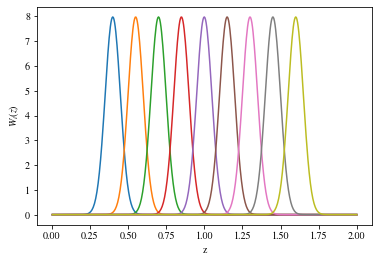

In [17]:
#Top-hat window functions have no interest here, since the cross-spectra would be basically zero
#So we go for Gaussian window functions
sigmaz    = 0.05
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
for i in range(nbins_G):
    plt.plot(z_arr,windows_G[i,:])
plt.xlabel('z') ; plt.ylabel('$W_i(z)$')
plt.show()

In [35]:
#Top-hat window functions have no interest here, since the cross-spectra would be basically zero
#So we go for Gaussian window functions
t0 = time.clock()
Sijkl_full = PySSC.Sijkl(z_arr,windows_G)
t1 = time.clock()

Sijkl_psky = PySSC.Sijkl_psky(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
t2 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs' %(t1-t0,t2-t1))

Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
Sij full sky took: 4.0 secs, part sky 24.2 secs


In [22]:
#Build indexing of pairs of redshift bins
npairs_G = (nbins_G*(nbins_G+1))//2
pairs_G  = np.zeros((2,npairs_G),dtype=int)
count       = 0
for ibin in range(nbins_G):
    for jbin in range(ibin,nbins_G):
        pairs_G[0,count] = ibin
        pairs_G[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_full_recast = np.zeros((npairs_G,npairs_G))
Sijkl_psky_recast = np.zeros((npairs_G,npairs_G))
for ipair in range(npairs_G):
    ibin = pairs_G[0,ipair]
    jbin = pairs_G[1,ipair]
    for jpair in range(npairs_G):
        kbin = pairs_G[0,jpair]
        lbin = pairs_G[1,jpair]
        Sijkl_full_recast[ipair,jpair] = Sijkl_full[ibin,jbin,kbin,lbin]
        Sijkl_psky_recast[ipair,jpair] = Sijkl_psky[ibin,jbin,kbin,lbin]

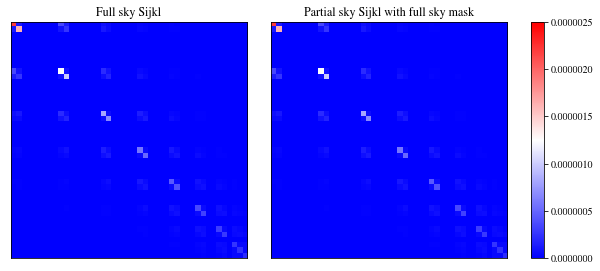

In [32]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(abs(Sijkl_full_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=0,vmax=2.5e-6)
im2 = axes[1].imshow(abs(Sijkl_psky_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=0,vmax=2.5e-6)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl with full sky mask')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

In [47]:
#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_psky_recast)==0)[0]
Sijkl_psky_recast_valid = np.delete(np.delete(Sijkl_psky_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_psky_recast_valid.shape[0]
print(nvalid)
invalid_list         = np.where(np.diag(Sijkl_full_recast)==0)[0]
Sijkl_full_recast_valid = np.delete(np.delete(Sijkl_full_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_full_recast_valid.shape[0]
print(nvalid)

17
17


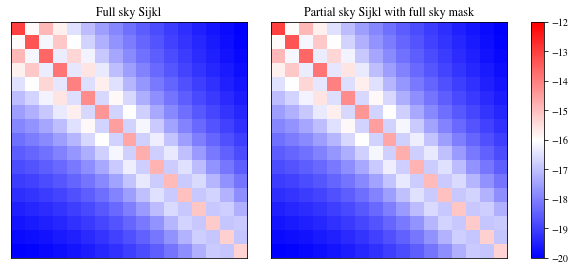

In [61]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_psky_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl with full sky mask')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

100.0% of the part sky Sij bins are within 1% of the Sij full sky value


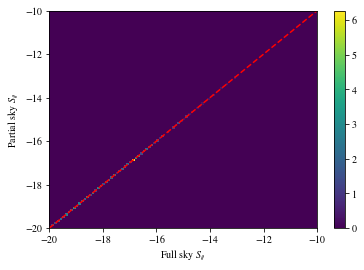

In [54]:
plt.figure()
plt.hist2d(np.log(abs(Sijkl_full_recast_valid)).flatten(),np.log(abs(Sijkl_psky_recast_valid)).flatten(),bins=100,density=True,range=[[-20,-10],[-20,-10]])
plt.plot(np.linspace(-20,-10,100),np.linspace(-20,-10,100),color='r',ls='--')
plt.xlabel(r'Full sky $S_{ij}$')
plt.ylabel(r'Partial sky $S_{ij}$')
plt.colorbar()

diff = (np.log(abs(Sijkl_full_recast_valid)) - np.log(abs(Sijkl_psky_recast_valid)))/np.log(abs(Sijkl_full_recast_valid)) *100
print('%.1f%% of the part sky Sij bins are within 1%% of the Sij full sky value' %(np.sum(diff<=1.)/nvalid**2 *100))

### Example: Partial sky Sijkl with Euclid mask

In [38]:
t0 = time.clock()
Sijkl_pskyE = PySSC.Sijkl_psky(z_arr,windows_G,clmask=None,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Sij part sky computed in %.1f mins' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 101
Sij part sky computed in 343.8 secs


In [39]:
#Build indexing of pairs of redshift bins
npairs_G = (nbins_G*(nbins_G+1))//2
pairs_G  = np.zeros((2,npairs_G),dtype=int)
count       = 0
for ibin in range(nbins_G):
    for jbin in range(ibin,nbins_G):
        pairs_G[0,count] = ibin
        pairs_G[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_pskyE_recast = np.zeros((npairs_G,npairs_G))
for ipair in range(npairs_G):
    ibin = pairs_G[0,ipair]
    jbin = pairs_G[1,ipair]
    for jpair in range(npairs_G):
        kbin = pairs_G[0,jpair]
        lbin = pairs_G[1,jpair]
        Sijkl_pskyE_recast[ipair,jpair] = Sijkl_pskyE[ibin,jbin,kbin,lbin]


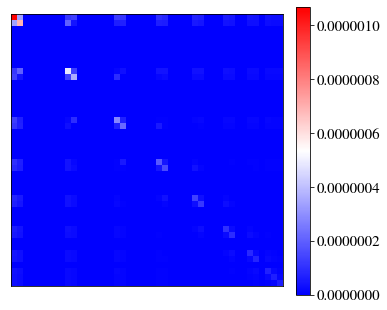

In [41]:
#Plot |Sijkl|
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(abs(Sijkl_pskyE_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin])
plt.xticks([]) ; plt.yticks([])
P.axes.tick_params(labelsize=15)
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()

In [45]:
#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_pskyE_recast)==0)[0]
Sijkl_pskyE_recast_valid = np.delete(np.delete(Sijkl_pskyE_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_pskyE_recast_valid.shape[0]

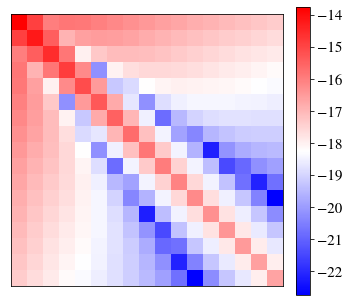

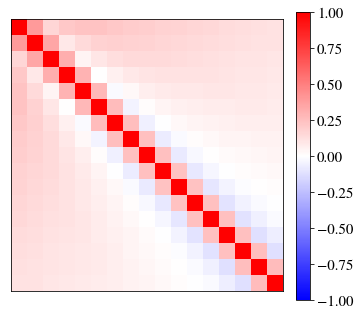

-0.1233222548884952


In [46]:
#Plot ln|Sijkl|
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(np.log(abs(Sijkl_pskyE_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin])
P.axes.tick_params(labelsize=15)
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
#Second plot the correlation matrix
correl_ijkl_pskyE= np.zeros((nvalid,nvalid))
for i in range(nvalid):
    for j in range(nvalid):
        correl_ijkl_pskyE[i,j] = Sijkl_pskyE_recast_valid[i,j] / np.sqrt(Sijkl_pskyE_recast_valid[i,i]*Sijkl_pskyE_recast_valid[j,j])
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correl_ijkl_pskyE,interpolation='none',cmap='bwr',vmin=-1,vmax=1,extent=[zmin,zmax,zmax,zmin])
plt.xticks([]) ; plt.yticks([])
P.axes.tick_params(labelsize=15)
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
print(correl_ijkl_pskyE.min())

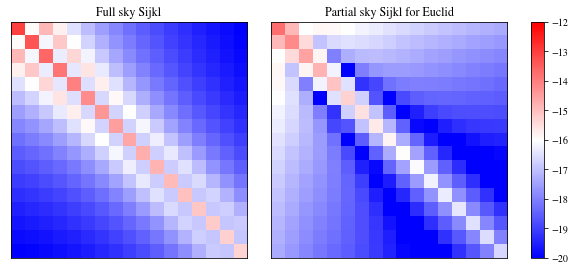

In [60]:
# Compare to full sky
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_pskyE_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl for Euclid')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)